In [31]:
# dependencies
import numpy as np

#################### Your Code ####################
ROOT_PATH='/content/sample_data/CIFAR'  # Modify this line with the path to the folder where folder "cifar-10-batches-py" locate
###################################################

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle(ROOT_PATH+"/data_batch_1")
batch2 = unpickle(ROOT_PATH+"/data_batch_2")
batch3 = unpickle(ROOT_PATH+"/data_batch_3")
batch4 = unpickle(ROOT_PATH+"/data_batch_4")
batch5 = unpickle(ROOT_PATH+"/data_batch_5")
test_batch = unpickle(ROOT_PATH+"/test_batch")


def load_data0(btch):
    labels = btch[b'labels']
    imgs = btch[b'data'].reshape((-1, 32, 32, 3))
    
    res = []
    for ii in range(imgs.shape[0]):
        img = imgs[ii].copy()
        img = np.fliplr(np.rot90(np.transpose(img.flatten().reshape(3,32,32)), k=-1))
        res.append(img)
    imgs = np.stack(res)
    return labels, imgs


def load_data():
    x_train_l = []
    y_train_l = []
    for ibatch in [batch1, batch2, batch3, batch4, batch5]:
        labels, imgs = load_data0(ibatch)
        x_train_l.append(imgs)
        y_train_l.extend(labels)
    x_train = np.vstack(x_train_l)
    y_train = np.vstack(y_train_l)
    
    x_test_l = []
    y_test_l = []
    labels, imgs = load_data0(test_batch)
    x_test_l.append(imgs)
    y_test_l.extend(labels)
    x_test = np.vstack(x_test_l)
    y_test = np.vstack(y_test_l)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
del batch1, batch2, batch3, batch4, batch5, test_batch

#################### Your Code ####################



###################################################

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [32]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [33]:
x_train.shape


(50000, 32, 32, 3)

In [34]:
y_train.shape

(50000, 1)

Basic Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
xtrain = x_train.reshape(50000, 3*32*32)
xtest = x_test.reshape(10000, 3*32*32)
ytrain = y_train.flatten()
ytest = y_test.flatten()

In [37]:
xtrain.shape

(50000, 3072)

In [38]:
ytrain.shape

(50000,)

In [39]:
logReg = LogisticRegression(verbose=True, n_jobs=-1, max_iter=25)

In [40]:
logReg.fit(xtrain, ytrain)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   31.3s finished


LogisticRegression(max_iter=25, n_jobs=-1, verbose=True)

In [41]:
predicted = logReg.predict(xtrain)

In [42]:
ytrain

array([6, 9, 9, ..., 9, 1, 1])

In [43]:
predicted

array([6, 1, 9, ..., 9, 8, 9])

In [44]:
np.unique((ytrain==0).astype(np.int8))

array([0, 1], dtype=int8)

In [45]:
predicted_r = np.round(predicted)

In [46]:
metrics.accuracy_score(ytrain, predicted)

0.38392

In [47]:
test_predicted = logReg.predict(xtest)

In [48]:
metrics.accuracy_score(ytest, test_predicted)

0.3797

Neural Network with a Convolution Layer





In [49]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [50]:
train_images = x_train.astype('float32') / 255.0
test_images = x_test.astype('float32') / 255.0
num_classes = len(classes)
train_labels = np.array(y_train, dtype='int32')
test_labels = np.array(y_test, dtype='int32')

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes))

In [52]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [53]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.4759 - accuracy: 0.4658 - val_loss: 1.2122 - val_accuracy: 0.5685
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1151 - accuracy: 0.6064 - val_loss: 1.0521 - val_accuracy: 0.6332
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9648 - accuracy: 0.6627 - val_loss: 0.9743 - val_accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8704 - accuracy: 0.6953 - val_loss: 0.9125 - val_accuracy: 0.6892
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8026 - accuracy: 0.7208 - val_loss: 0.8901 - val_accuracy: 0.6980
Epoch 6/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7446 - accuracy: 0.7402 - val_loss: 0.8984 - val_accuracy: 0.6911
Epoch 7/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.6967 - accuracy: 0.7556 - val_loss: 0.9020 -

In [54]:
import matplotlib.pyplot as plt


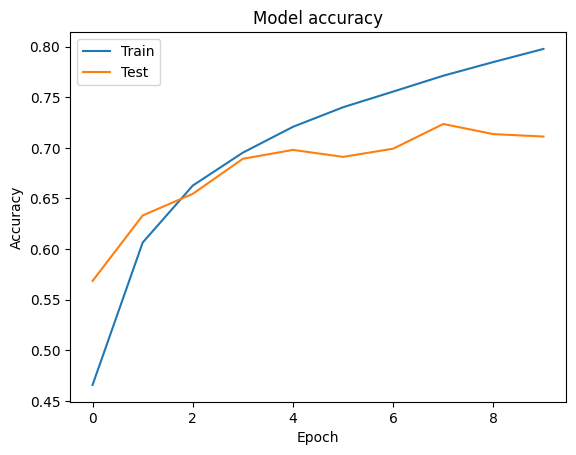

In [58]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

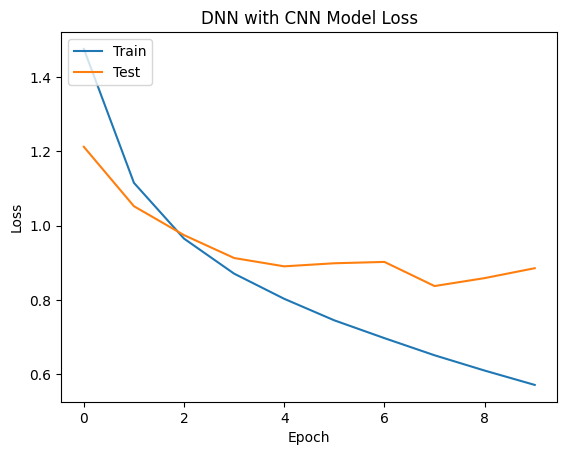

In [59]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN with CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Neural Network without a Convolution Layer

In [60]:
model_without = models.Sequential()
model_without.add(layers.Flatten(input_shape=(32, 32, 3)))
model_without.add(layers.Dense(128, activation='relu'))
model_without.add(layers.Dense(num_classes))

In [61]:
model_without.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [62]:
history1 = model_without.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8973 - accuracy: 0.3172 - val_loss: 1.7935 - val_accuracy: 0.3599
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7409 - accuracy: 0.3770 - val_loss: 1.7395 - val_accuracy: 0.3647
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6892 - accuracy: 0.3966 - val_loss: 1.6687 - val_accuracy: 0.3977
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6583 - accuracy: 0.4051 - val_loss: 1.6944 - val_accuracy: 0.3955
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6369 - accuracy: 0.4145 - val_loss: 1.6268 - val_accuracy: 0.4194
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6176 - accuracy: 0.4221 - val_loss: 1.6058 - val_accuracy: 0.4233
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6015 - accuracy: 0.4282 - val_loss: 1.5953 - val_ac

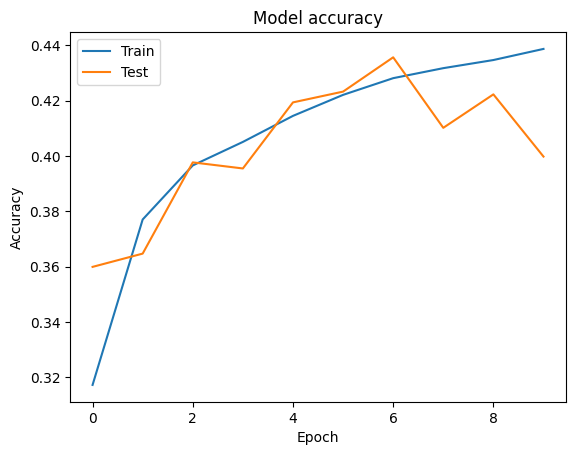

In [63]:
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

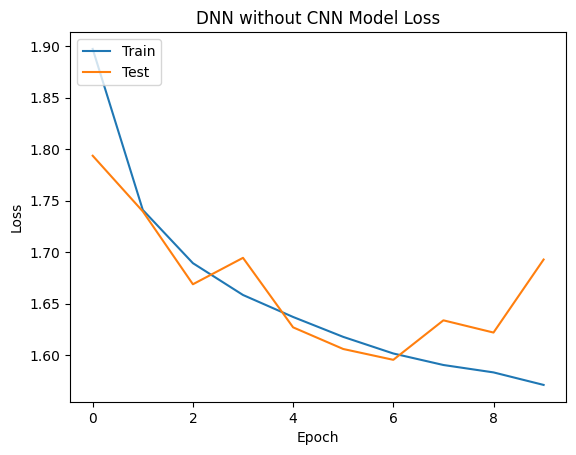

In [64]:
# Plot training & validation accuracy values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('DNN without CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()